This project was completed as a part of George Washington University's Data Analysis and Visualization course. My goal was to use Tweepy to scrape five different news outlets' recent tweets, then use the Vader Sentiment Analyzer to determine the sentiment (positive, negative, or neutral tone) of the tweet. I then used PyPlot to visualize the findings.

## News Mood

In [21]:
#import dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

%matplotlib inline
plt.style.use('fivethirtyeight')

In [22]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [23]:
# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

## Pull tweets from the BBC, CBS, CNN, Fox News, and New York Times Twitter feeds

In [24]:
outlets = ("@BBCNews", "@CBSNews", "@CNN", "@FoxNews", "@NYTimes")
outlet_names = ("BBC", "CBS", "CNN", "Fox", "NY Times")

#temporary lists
text_list = []
source_list = []
number_list = []
compound_list = []
pos_list = []
neu_list = []
neg_list = []

#list to calculate mean sentiment scores later
mean_compounds = []


#loop through Twitter accounts
for outlet in outlets:

    oldest_tweet = None
    tweet_counter = 1
    temp_compound= []
    
    #pull 100 most recent tweets
    public_tweets = api.user_timeline(outlet, count=100, max_id=oldest_tweet)
    

    #loop through tweets and record info
    for tweet in public_tweets:
        
        text_list.append(tweet["text"])
        source_list.append(tweet["user"]["name"])
        number_list.append(tweet_counter)
        
        
        scores=analyzer.polarity_scores(tweet["text"])
        
        compound_list.append(scores["compound"])
        temp_compound.append(scores["compound"])
            
        pos_list.append(scores["pos"])   
        neu_list.append(scores["neu"])   
        neg_list.append(scores["neg"])
        
        tweet_counter = tweet_counter + 1
        
        oldest_tweet = tweet["id"] - 1
        
    mean_compounds.append(np.mean(temp_compound))

## Organize Tweet data

In [25]:
#Compile tweet data into a dataframe

summary_df = pd.DataFrame({
    "Text": text_list,
    "Source": source_list,
    "Tweets Ago": number_list,
    "Compound Score": compound_list,
    "Positive Score": pos_list,
    "Neutral Score": neu_list,
    "Negative Score": neg_list
})
        
#New dataframe to hold data for a bar graph

bar_df = pd.DataFrame({
    "News Outlet": outlet_names,
    "Average Compound Scores": mean_compounds
})

summary_df.head()

,Compound Score,Negative Score,Neutral Score,Positive Score,Source,Text,Tweets Ago
0,0.00,0.000,1.000,0.0,BBC News (UK),"Thursday's Express: ""What more does she have t...",1
1,0.00,0.000,1.000,0.0,BBC News (UK),"Thursday's i: ""Back me and sack me"" (via @MsHe...",2
2,-0.34,0.211,0.789,0.0,BBC News (UK),"Thursday's Times: ""May vows to resign"" (via @M...",3
3,0.00,0.000,1.000,0.0,BBC News (UK),"Thursday's Mirror: ""The end of May"" (via @MsHe...",4
4,0.00,0.000,1.000,0.0,BBC News (UK),"Thursday's Telegraph: ""May falls on her sword""...",5


In [26]:
#Break tweet data up by news outlet

BBC_df = summary_df.loc[summary_df["Source"] == "BBC News (UK)"]
CBS_df = summary_df.loc[summary_df["Source"] == "CBS News"]
CNN_df = summary_df.loc[summary_df["Source"] == "CNN"]
FOX_df = summary_df.loc[summary_df["Source"] == "Fox News"]
NYT_df = summary_df.loc[summary_df["Source"] == "The New York Times"]

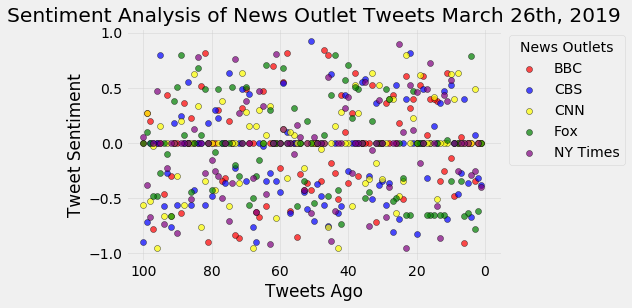

In [27]:
#Plot all tweets to compare
BBC_plot = plt.scatter(BBC_df["Tweets Ago"], BBC_df["Compound Score"], color="red", alpha=.7, edgecolors="black")
CBS_plot = plt.scatter(CBS_df["Tweets Ago"], CBS_df["Compound Score"], color="blue", alpha=.7, edgecolors="black")
CNN_plot = plt.scatter(CNN_df["Tweets Ago"], CNN_df["Compound Score"], color="yellow", alpha=.7, edgecolors="black")
FOX_plot = plt.scatter(FOX_df["Tweets Ago"], FOX_df["Compound Score"], color="green", alpha=.7, edgecolors="black")
NYT_plot = plt.scatter(NYT_df["Tweets Ago"], NYT_df["Compound Score"], color="purple", alpha=.7, edgecolors="black")


plt.title("Sentiment Analysis of News Outlet Tweets March 26th, 2019")
plt.ylabel("Tweet Sentiment")
plt.xlabel("Tweets Ago")
plt.legend(labels=outlet_names, bbox_to_anchor=(1,1), title="News Outlets")
plt.grid(alpha=.4)
plt.xlim(105,-5)
plt.savefig("scatter.png")

plt.show()


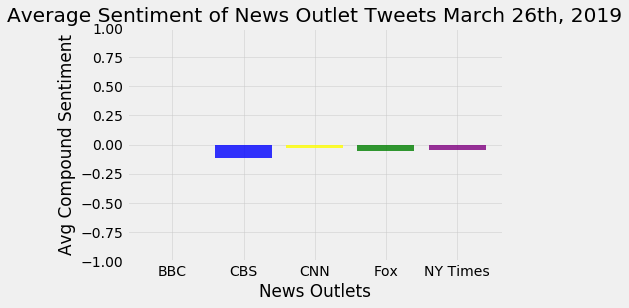

In [28]:
#Bar chart to compare average scores

colors = ("red", "blue", "yellow", "green", "purple")
bar = plt.bar(bar_df["News Outlet"], bar_df["Average Compound Scores"], color=colors, alpha=.8)
plt.title("Average Sentiment of News Outlet Tweets March 26th, 2019")
plt.ylabel("Avg Compound Sentiment")
plt.ylim(top=1, bottom=-1)
plt.xlabel("News Outlets")
plt.grid(alpha=.5)
plt.savefig("bar.png")
plt.show()

In [30]:
#Save output file
summary_df.to_csv("output.csv")